<a href="https://colab.research.google.com/github/junghyeon0114/Do_it_pandas/blob/main/2_Do_it_CH12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ch12 시계열 데이터



241~271

**datetime 오브젝트**


In [1]:
# 1. datetime 라이브러리 불러오기

from datetime import datetime


In [4]:
#2. now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있음.

now1= datetime.now()
print(now1)

now2= datetime.today()
print(now2)

2023-08-07 05:38:41.046674
2023-08-07 05:38:41.048480


In [5]:
#3. 시간을 직접 입력해 인자로 전달

t1= datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-08-07 05:39:18.924777
1970-01-01 00:00:00
1970-12-12 13:24:34


In [6]:
#4.시간계산

diff1= t1-t2
print(diff1)
print(type(diff1))

diff2=t2-t1
print(diff2)
print(type(diff2))

19576 days, 5:39:18.924777
<class 'datetime.timedelta'>
-19577 days, 18:20:41.075223
<class 'datetime.timedelta'>


- 시계열 데이터를 문자열로 저장 : to_datetime

In [1]:
#1.ebola 데이터 집합 불러오기

import pandas as pd
import os

ebola = pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv")

#2.문자열로 저장된 Date 열

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [2]:
#3. to_datetime : Date 열의 자료형을 datetime 오브젝트로 변환

ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [3]:
#4
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day' ], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


**시간 형식 지정자**

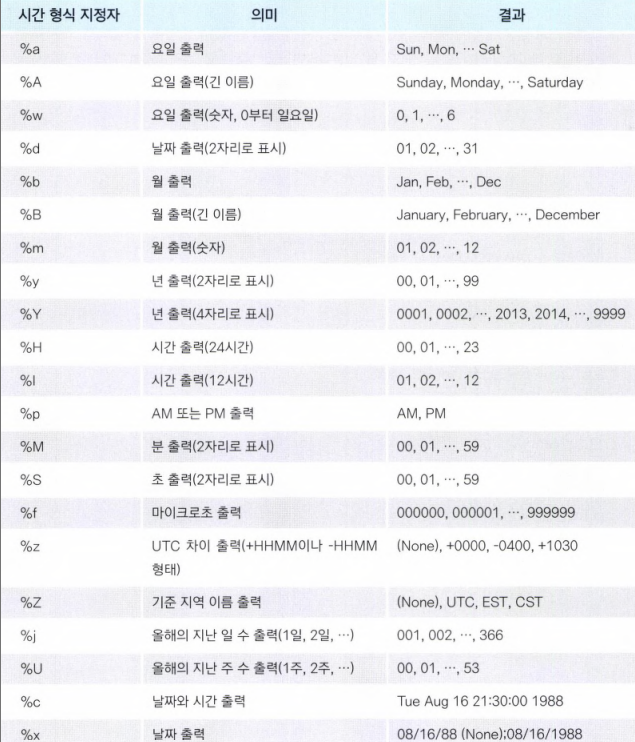

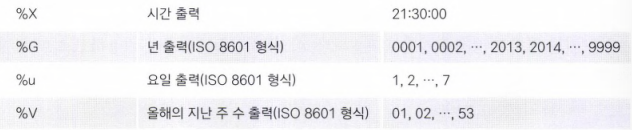

**datetime 오브젝트로 변변환하려는 열을 지정하여 데이터 접합 불러오기**

In [4]:
ebola1=pd.read_csv('/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv', parse_dates=['Date'])

print(ebola.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [5]:
#datetime 오브젝트에서 날짜 정보 추출하기

#1. 다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

date_series=pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [6]:
#2. datetime 오브젝트의 year, month, day의 속성을 이용하면 년,월,일 정보 바로 추출

print(d1[0].year)

print(d1[0].month)

print(d1[0].day)

2018
5
16


**dt 접근자 사용하기**

dt 접근자로 시계열 데이터 정렬

In [8]:
#1.ebola 데이터에 새로운 열 추가

ebola=pd.read_csv('/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [11]:
#2. dt 접근자 사용하지 않고 인덱스가 3인 데이터의 년,월,일 데이터 추출
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [12]:
print(ebola['date_dt'][3].year)

2015


In [13]:
print(ebola['date_dt'][3].month)

1


In [14]:
print(ebola['date_dt'][3].day)

2


In [15]:
#3. dt 접근자로 date_dt 열에 접근해 year 속성을 이용해 연도 값을 추출
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head( ))

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [16]:
#4.과정 3을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열 추가

ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [17]:
#5.
print(ebola.info( ))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#12-2 사례별 시계열 데이터 계산하기


**에볼라 최초 발병일 계산하**

In [18]:
#1. ebola 데이터프레임의 마지막 행과 열을 5개씩 살펴보기

print(ebola.iloc[-5:, :5])


          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [19]:
#2. min 메서드 : 최초 발병일

print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
#3.에볼라 진행 정도

ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


**파산한 은행의 개수 계산**

In [22]:
#1. 데이터 불러오기

banks=pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/banklist.csv")
print(banks.head( ))

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [25]:
#2. datetime 오브젝트로 만자열로 저장된 두 열 변환해서 불러오기

banks_no_dates = pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/banklist.csv")
print(banks_no_dates.info( ))

banks=pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/banklist.csv", parse_dates=[5, 6])
print(banks.info( ))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

In [26]:
#3.dt접근자와 year, quarter 속성을 이용하여 은행어 파산한 연도, 분기를 새로운 열로 추가한 것

banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [27]:
#4. 파산한 은행 :groupby 메서드
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [28]:
#5. 각 연도별, 분기별 파산한 은행 개수

closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size( )
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

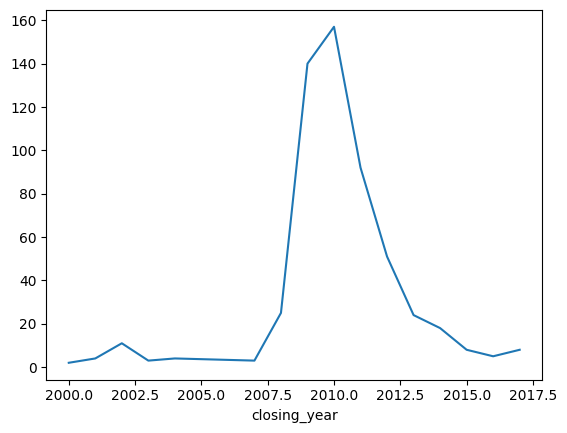

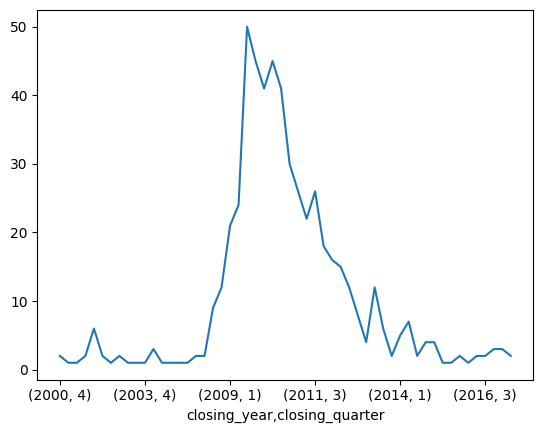

In [29]:
#6.5의 결과 그래프로

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax= closing_year.plot()

plt.show( )
fig, ax = plt.subplots( )
ax = closing_year_q.plot()
plt.show( )

**테슬라 주식 데이터로 시간 계산**

In [30]:
pip install pandas-datareader


In [36]:
#1.
import pandas as pd
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터프레임 저장
#tesla = pdr.get_data_quandl('TSLA', api_key='xsGRWnp5cdoFs_XzoU3x')

# tesla에 저장된 데이터프레임을 파일로 저장합니다.
#tesla.to_csv('/content/tesla_stock_quandl.csv')

tesla = pd.read_csv('/content/drive/MyDrive/Doit_판다스입문_소스/data/tesla_stock_quandl.csv')
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [41]:
tesla=pd.read_csv('/content/drive/MyDrive/Doit_판다스입문_소스/data/tesla_stock_quandl.csv',parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [42]:
#4. date 열의 자료형이 datetime 오브젝트로 변환. 이제 dt 접근자를 사용할 수 있음. 불린추출로 2010 6월의 데이터만 추출

print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)])


           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


**datetime 오브젝트와 인덱스 : DatetimeIndex**

datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [44]:
#1. date 열을 tesla 데이터프레임의 인덱스로 지정

tesla.index=tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [45]:
#2. datetime 오브젝트를 인덱스로 지정하면 다음과 같은 방법으로 원하는 시간의 데이터 바로 추출 가능

print(tesla['2015'].iloc[:5,:5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


<ipython-input-45-b7592d8999e0>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5,:5])


In [46]:
#3. 다음은 2010년 6월의 데이터 추출
print(tesla['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


<ipython-input-46-73fb7f7106b5>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:,:5])


**시간 간격과 인덱스 : TimedeltaIndex**

: 시간 간격을 인덱스로 지정해 데이터 추출

In [47]:
#1.Date 열에서 Date 열의 최솟값을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있음.
tesla['ref_date']=tesla['Date']-tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [48]:
#2. 다음과 같이 ref_date 열을 인덱스로 지정. 시간 간격을 이용해 데이터 추출 가능

tesla.index=tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [50]:
#3. 데이터 수집 이후 최초 5일의 데이터 추출

print(tesla['5 days':].iloc[:5,:5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


**시간 범위와 인덱스로 지정하기**


In [51]:
#1. 시간 범위 생성해 인덱스로 지정하기

ebola = pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv", parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [52]:
#2. 뒤쪽 데이터 확인 : 2021/03/23 데이터 누락
ebola.iloc[:-5, :-5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2014-04-04,13,143.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,86.0,7.0,2.0
113,2014-04-01,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0
114,2014-03-31,9,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0
115,2014-03-29,7,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN


In [53]:
#3. date_range 메서드룰 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이이의 시간 인텍스(Datetimeindex)룰 생성
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [54]:
#4.다옴은 원본 데이터를 손상시키는 것을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임 만들기

ebola_5 = ebola.head( )
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


시간 범위의 주기 설정하기

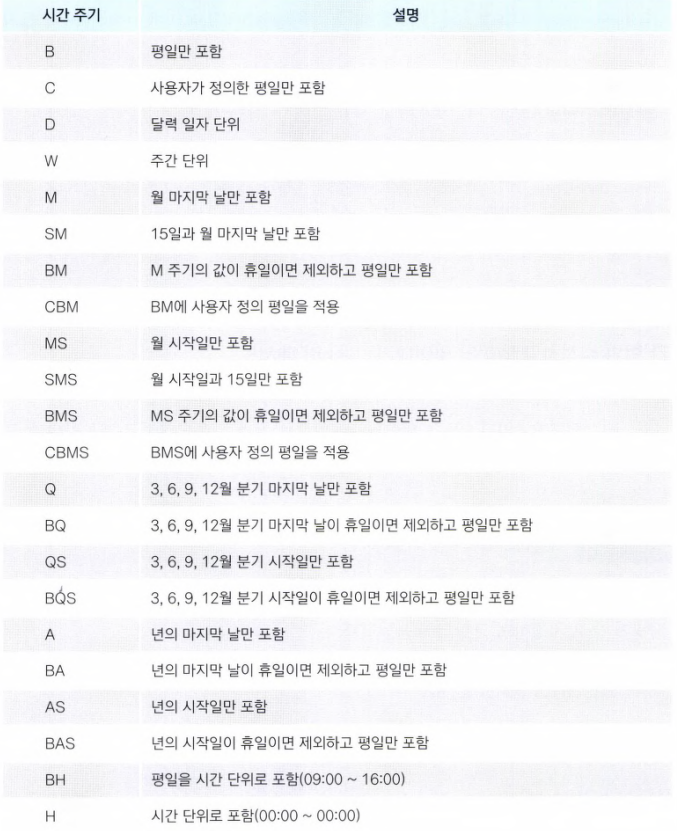


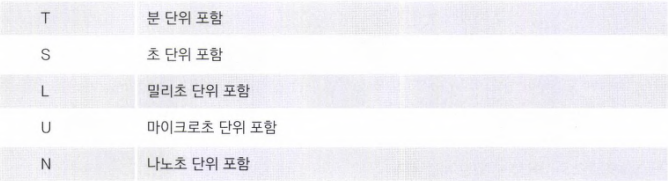

**시간 범위 수정하고 데이터 밀어내기 - shift 메서드**

에볼라의 확산 속도 비교하기

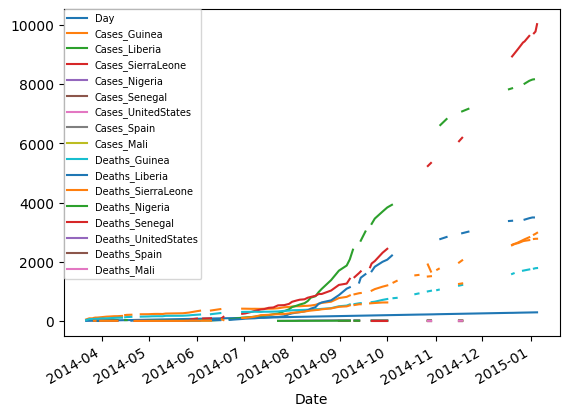

In [55]:
#1. 인덱스 : date, x축 : date열, y축: 사망자 수

ebola = pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv", parse_dates=[0])


import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig,ax=plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)

ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [57]:
#2. 발병일 처음 발병한 Guinea와 동일한 위치로 옮기기

ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [69]:
#3. 데이터프레임 준비

ebola = pd.read_csv("/content/drive/MyDrive/Doit_판다스입문_소스/data/country_timeseries.csv", parse_dates=['Date'])
print(ebola.head( ).iloc[:, :5])
print(ebola.tail( ).iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [70]:
#4. Date 열 인덱스로 지정. 최댓값과 최솟값으로 시간 범위 생성해 new_idx에 저장

ebola.index = ebola['Date']
new_idx=pd.date_range(ebola.index.min(), ebola.index.max())


In [71]:
#5.시간 순서를 맞추기 위해 reversed 메서드

print(new_idx)
new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [72]:
#6.  reindex 메서드

ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [73]:
#7. 각 나라의 에볼라 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [74]:
#8. 각 나라의 에볼라 발병일 동일한 출발선 : 에볼라 가장 처음 발병->에볼라 발병일 뺀 만큼 옮기기

earliest_date = ebola.index.min( )
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [75]:
#7. 각 나라의 에볼라 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [76]:
#8. 각 나라의 에볼라 발병일 동일한 출발선 : 에볼라 가장 처음 발병->에볼라 발병일 뺀 만큼 옮기기

earliest_date = ebola.index.min( )
print(earliest_date)

shift_values = last_valid-earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [77]:
#9. 각 나라의 에볼라 발병일 옮기기. shift 메서드 사용.

ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

In [78]:
#10. 데이터 프레임 변환

ebola_shift = pd.DataFrame(ebola_dict)

In [79]:
#11
print(ebola_shift.tail( ))

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [80]:
#12
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail( ))

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

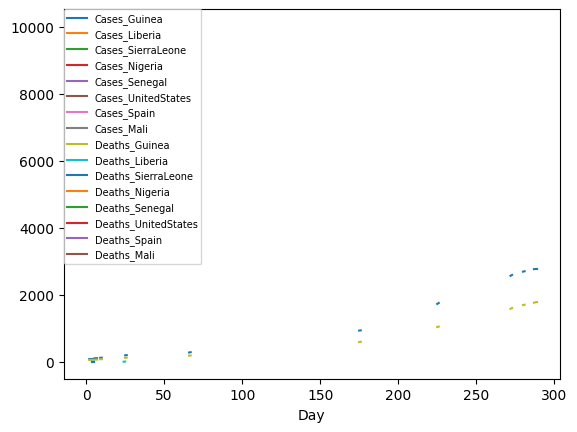

In [81]:
fig, ax = plt.subplots( )
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show( )